Yacub Bholat  
Data Analysis and Visualization Boot Camp  
API Homework - What's the Weather Like?  
Due: 6 January 2020  

# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "city_weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
cities = []
num_cities = 3000

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=num_cities)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=num_cities)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If city is unique, add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

1028

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
def get_weather(cities, api_key):
    print("----------------------------------")
    print("Beginning Data Retrieval")
    print("----------------------------------")
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    
    out_cities = []
    n = 1
    for city in cities:
        payload = {
            "appid": api_key,
            "q": city
        }

        r = requests.get(url, params=payload)

        if r.status_code == 200:
            print(f"City #{n}: Processing {city.capitalize()}...")
            out_cities.append(r.json())
        else:
            print(f"City #{n}: Not found. Skipping {city.capitalize()}...")
        n += 1
    
    print("----------------------------------")
    print("Data Retrieval Complete")
    print("----------------------------------")
    
    return out_cities

In [4]:
out_cities = get_weather(cities, api_key)

----------------------------------
Beginning Data Retrieval
----------------------------------
City #1: Processing Albany...
City #2: Processing Roma...
City #3: Processing Ushuaia...
City #4: Processing Bandarbeyla...
City #5: Processing Goma...
City #6: Processing Padang...
City #7: Processing Zaysan...
City #8: Processing Rikitea...
City #9: Not found. Skipping Illoqqortoormiut...
City #10: Processing Narsaq...
City #11: Processing New norfolk...
City #12: Processing Arraial do cabo...
City #13: Processing Sungaipenuh...
City #14: Processing Vila franca do campo...
City #15: Processing Cidreira...
City #16: Processing Nevsehir...
City #17: Processing Ahipara...
City #18: Processing Mataura...
City #19: Processing Hamilton...
City #20: Processing Atuona...
City #21: Processing Cape town...
City #22: Processing Acapulco...
City #23: Processing Port lincoln...
City #24: Processing Belmonte...
City #25: Processing Praia...
City #26: Processing Acucena...
City #27: Processing Punta arena

##### Print first entry to understand structure

In [5]:
out_cities[0]

{'coord': {'lon': -73.75, 'lat': 42.65},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': 273.11,
  'feels_like': 266.64,
  'temp_min': 270.37,
  'temp_max': 275.15,
  'pressure': 1010,
  'humidity': 55},
 'visibility': 16093,
 'wind': {'speed': 5.1, 'deg': 290, 'gust': 8.2},
 'clouds': {'all': 90},
 'dt': 1577927162,
 'sys': {'type': 1,
  'id': 3273,
  'country': 'US',
  'sunrise': 1577881506,
  'sunset': 1577914279},
 'timezone': -18000,
 'id': 5106834,
 'name': 'Albany',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_data = [{
    "City": city["name"],
    "Cloudiness (%)": city["clouds"]["all"],
    "Country": city["sys"]["country"],
    "Date (Unix UTC)": city["dt"],
    "Humidity (%)": city["main"]["humidity"],
    "Lat": city["coord"]["lat"],
    "Lng": city["coord"]["lon"],
    "Max Temp (F)": (city["main"]["temp_max"] - 273.15) * (9/5) + 32, # convert from kelvin
    "Wind Speed (mph)": city["wind"]["speed"] * 2.237 # convert from meters per second
} for city in out_cities]

city_data = pd.DataFrame(city_data)
city_data.to_csv(output_data_file)
city_data.count()

City                929
Cloudiness (%)      929
Country             929
Date (Unix UTC)     929
Humidity (%)        929
Lat                 929
Lng                 929
Max Temp (F)        929
Wind Speed (mph)    929
dtype: int64

In [8]:
city_data.head()

,City,Cloudiness (%),Country,Date (Unix UTC),Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Albany,90,US,1577927162,55,42.65,-73.75,35.600,11.4087
1,Rome,0,IT,1577926987,65,41.89,12.48,48.002,6.9347
2,Ushuaia,75,AR,1577927247,59,-54.81,-68.31,60.800,12.7509
3,Bandarbeyla,4,SO,1577927247,80,9.49,50.81,78.224,14.7642
4,Goma,98,CD,1577927247,89,-1.67,29.23,55.814,0.6711


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Longitude Plot

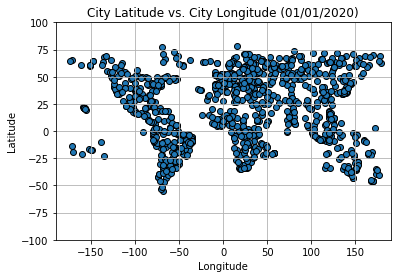

In [9]:
plt.title("City Latitude vs. City Longitude (01/01/2020)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-190, 190)
plt.ylim(-100, 100)
plt.grid(axis="both")
plt.scatter(city_data["Lng"],
            city_data["Lat"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("01 City Latitude vs. City Longitude.png")
plt.show()

#### Latitude vs. Temperature Plot

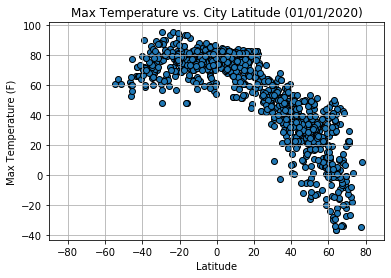

In [10]:
plt.title("Max Temperature vs. City Latitude (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Max Temp (F)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("02 Max Temperature vs. City Latitude.png")
plt.show()

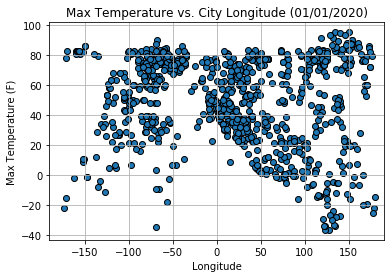

In [11]:
plt.title("Max Temperature vs. City Longitude (01/01/2020)")
plt.xlabel("Longitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-190, 190)
plt.grid(axis="both")
plt.scatter(city_data["Lng"],
            city_data["Max Temp (F)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("02 Max Temperature vs. City Longitude.png")
plt.show()

#### Latitude vs. Humidity Plot

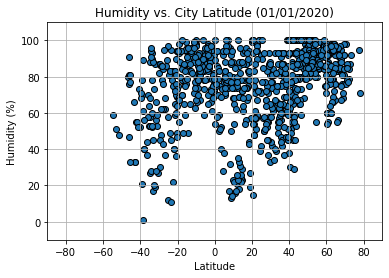

In [12]:
plt.title("Humidity vs. City Latitude (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Humidity (%)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("03 Humidity vs. City Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

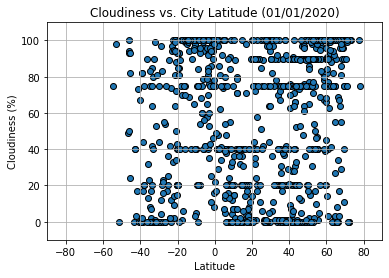

In [13]:
plt.title("Cloudiness vs. City Latitude (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-10, 110)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Cloudiness (%)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("04 Cloudiness vs. City Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

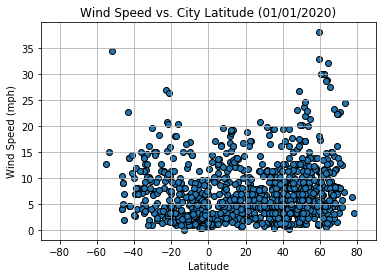

In [14]:
plt.title("Wind Speed vs. City Latitude (01/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90, 90)
plt.grid(axis="both")
plt.scatter(city_data["Lat"],
            city_data["Wind Speed (mph)"],
            marker='o',
            edgecolors="black"
           )
plt.savefig("05 Wind Speed vs. City Latitude.png")
plt.show()